# Singular Value Decomposition (SVD)

SVD is an incredibly useful matrix factorization that is widely used in both theoretical and applied mathematics. The beauty of SVD is that it makes it easy to select information that is most important. Larger singular values corresponds to more informative columns in the matrix factors. 

#### Schmidt, Mirsky, Echart-Young Theorem
Given any matrix A, its rank $s$ approximation $A_s$ is the best rank $s$ approximation of A with respect to both the induced 2-norm and Frobenius norm. This concept is so useful that it appears in signal processing, statistics, machine learning, semantic indexing (think of search engines), and control theory.

Relevant Wikipedia Page [here](https://en.wikipedia.org/wiki/Low-rank_approximation)

### Compact SVD Algorithm

**Pseudocode for compact_svd(A)**
1. $\lambda, V = eig(A^{H}A)$ - Ah here represents the Hermitian of A which can be computed with A.conj().T
1. $\sigma \leftarrow \sqrt{\lambda}$
1. $\sigma \leftarrow \text{sort}(\sigma)$ - sort values from highest to lowest
1. $V \leftarrow \text{sort}(V)$ - sort eigenvectors same way as previous step
1. $r \leftarrow count(\sigma \ne 0)$ - count the number of nonzero singular values (the rank of A)
1. $\sigma_{new} = \sigma_{:r}$ - only keep the positive singular values
1. $V_{new} = V_{:, :r}$ - only keep corresponding eigenvectors
1. $U_{new} = AV_{new}/\sigma_{new}$
1. return $U_{new}, \sigma_{new}, V^{H}_{new}$

In [5]:
import numpy as np
from scipy import linalg

In [14]:
A = np.random.random((10, 4))

In [41]:
def compact_SVD(A):
    # get the eigenvalues and eigenvectors
    eigs, eigv = linalg.eigh(A.conj().T.dot(A))

    # get the singular values
    sig = np.sqrt(eigs)

    # index to be used to sort singular values and eigenvectors from largest to smallest
    idx = np.argsort(sig)[::-1]

    # sort sigma and V
    sig = sig[idx]
    V = eigv[idx]

    # count the number of positive singular values
    r = (sig > tol).sum()

    # update sigma and V
    sig_ = sig[:r]
    V_ = V[:r]

    # compute U
    U_ = A.dot(V_) / sig_
    
    return U_, sig_, V_.conj().T

In [42]:
U, sig, Vh = compact_SVD(A)

In [43]:
U

array([[-1.14844135e-01, -6.28849176e-02, -4.54260652e-01,
        -3.30224096e+00],
       [ 1.55903726e-02,  1.52923370e-01,  7.95045480e-01,
        -3.10653187e+00],
       [-6.35013672e-02, -1.70041115e-01, -1.01811719e+00,
        -3.16358119e+00],
       [ 1.83054988e-02,  2.05378329e-01,  6.21963212e-01,
        -4.19668089e+00],
       [ 8.52800254e-02,  5.86302879e-02,  3.06363104e-01,
        -2.04134941e+00],
       [ 1.42515936e-02, -1.68401641e-01, -6.91757690e-03,
        -3.93071216e+00],
       [ 5.09410869e-03, -8.30533239e-02, -2.00917470e-01,
        -5.70537150e+00],
       [ 1.40443923e-01, -7.54677376e-02, -2.58605818e-01,
        -3.38848195e+00],
       [ 6.67430690e-02,  5.18510724e-02,  1.32273130e-01,
        -3.62675669e+00],
       [-9.28755915e-02, -2.60913060e-01, -3.99675016e-01,
        -2.63317838e+00]])

In [44]:
sig

array([3.26040415, 1.22881465, 0.64520847, 0.28343796])

In [45]:
Vh

array([[ 0.71984159, -0.09584824, -0.68009593, -0.10055208],
       [ 0.07430364, -0.87456478,  0.13387561,  0.4601008 ],
       [ 0.40360448, -0.23843341,  0.5615997 , -0.68180548],
       [-0.55983076, -0.41121658, -0.45183252, -0.55976586]])

In [49]:
U.shape

(10, 4)

In [50]:
np.diag(sig).shape

(4, 4)

In [51]:
Vh.shape

(4, 4)

In [53]:
((U.dot(np.diag(sig)).dot(Vh) - A)**2).sum()

2.4938866849870317e-30

In [54]:
A.size

40

In [59]:
U[:, 0].size + sig[0].size + Vh[0, :].size

15

### SVD Demo (Image Compression)

In [60]:
import scipy.misc as misc
import matplotlib.pyplot as plt

%matplotlib inline

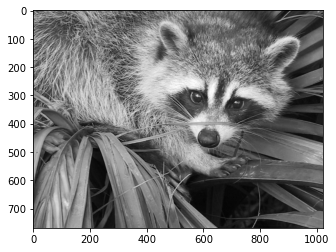

In [66]:
# load image
img = misc.face().mean(axis=2)

plt.imshow(img, cmap='gray');

In [68]:
img.shape

(768, 1024)

In [67]:
# use svd
U, s, Vh = linalg.svd(img)

In [69]:
U.shape, s.shape, Vh.shape

((768, 768), (768,), (1024, 1024))

In [72]:
def plot_reconstruction(rank):
    U_recon = U[:, :rank]
    s_recon = s[:rank]
    Vh_recon = Vh[:rank, :]

    img_recon = U_recon.dot(np.diag(s_recon)).dot(Vh_recon)
    plt.imshow(img_recon, cmap='gray')

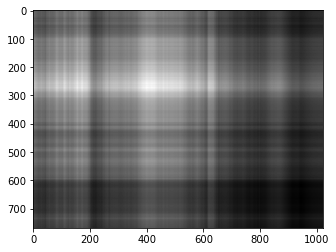

In [73]:
plot_reconstruction(1)

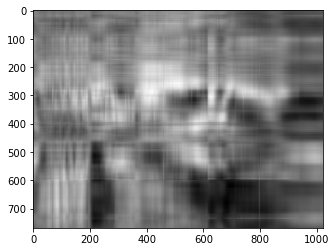

In [75]:
plot_reconstruction(5)

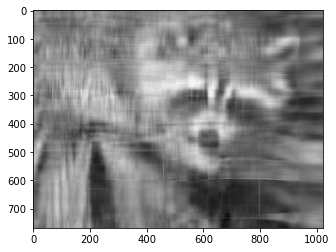

In [76]:
plot_reconstruction(10)

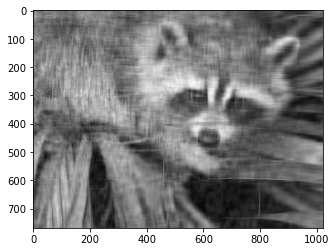

In [77]:
plot_reconstruction(20)

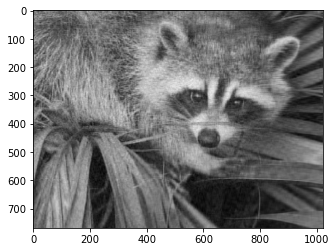

In [78]:
plot_reconstruction(50)

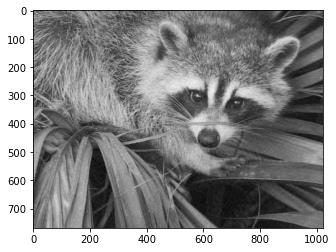

In [79]:
plot_reconstruction(100)

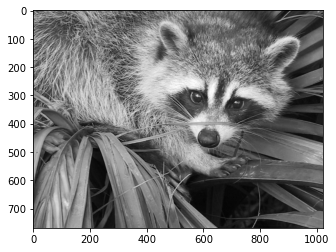

In [74]:
plot_reconstruction(768)

In [ ]:
1B people x 100k movies

U - 1B x 2
s - 2
Vh - 2 x 100k